In [1]:
import sys
sys.path.append("../lib/")

import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression

In [2]:
from raman_lib.preprocessing import SavGolFilter, RangeLimiter, BaselineCorrector, PeakPicker
from raman_lib.misc import load_data

In [3]:
data = load_data("../data/L_540_2022_C_E.csv")
data

,label,440.0,440.5,441.0,441.5,442.0,442.5,443.0,443.5,444.0,...,1805.5,1806.0,1806.5,1807.0,1807.5,1808.0,1808.5,1809.0,1809.5,1810.0
0,Control,9551.334961,9555.827148,9560.325195,9567.156250,9579.791016,9602.325195,9631.974609,9665.241211,9697.399414,...,821.933167,819.547119,815.598145,811.992371,808.245239,804.504272,803.451904,807.057678,813.057251,817.193604
1,Control,10458.841797,10446.866211,10430.693359,10408.302734,10382.478516,10357.313477,10335.406250,10317.475586,10302.212891,...,1960.335449,1953.519165,1950.050537,1950.620728,1951.223999,1949.279663,1946.670776,1946.825073,1949.477539,1951.279297
2,Control,2525.415283,2532.400146,2537.476807,2539.295654,2538.952881,2538.192383,2538.431152,2539.968018,2541.993896,...,595.429199,597.700928,599.022888,599.593933,599.178833,597.297607,594.455688,592.088501,591.304260,591.917969
3,Control,2207.853027,2216.539062,2223.419434,2227.755859,2229.572754,2229.244873,2227.518555,2224.224609,2219.760742,...,1094.972290,1089.802979,1087.647461,1090.088257,1095.169800,1100.701050,1104.530151,1105.415283,1103.453003,1098.966431
4,Control,2072.619141,2076.901367,2080.495850,2081.872070,2080.406738,2076.706543,2072.312744,2068.184570,2064.828369,...,668.945435,666.156067,667.783997,673.334167,678.374634,678.847778,675.064697,670.153198,667.591064,668.397034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,Etoposide,4324.567383,4309.552246,4297.772949,4288.082520,4279.221191,4270.135254,4260.723145,4251.879395,4244.444824,...,1111.780640,1110.168945,1109.513794,1109.591675,1109.890381,1109.257324,1106.616821,1102.607788,1098.908569,1096.416992
875,Etoposide,11000.471680,10965.001953,10936.359375,10911.935547,10889.791992,10868.546875,10849.276367,10833.564453,10822.385742,...,2335.459961,2331.223877,2323.342285,2316.918213,2318.944580,2326.237061,2332.652832,2333.804688,2330.145508,2325.216309
876,Etoposide,7073.573730,7059.198730,7041.097168,7021.822266,7003.113770,6986.574707,6974.891113,6968.677246,6967.905762,...,1536.322998,1531.775024,1522.270142,1512.583252,1508.623535,1509.210205,1510.804443,1510.013428,1506.386475,1501.737305
877,Etoposide,4257.303223,4247.423828,4237.972656,4230.412109,4225.356934,4222.058594,4219.541992,4216.154297,4210.751465,...,1174.385864,1174.004761,1175.262695,1176.037964,1174.351562,1171.097778,1168.076294,1167.142090,1168.812012,1170.863281


In [4]:
X = data.loc[:, data.columns != "label"]
wns = np.asarray(X.columns.astype(float))
X = np.asarray(X)
y = np.asarray(data.label)
y, y_key = pd.factorize(y)

In [5]:
X_orig = X.copy()
X = BaselineCorrector().fit_transform(X)

In [16]:
from scipy.signal import savgol_filter, argrelmax

In [89]:
X_sg = savgol_filter(X, 35, polyorder=2, deriv=1)

In [90]:
import matplotlib.pyplot as plt

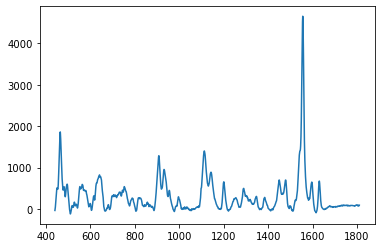

In [91]:
plt.plot(wns, X[0])

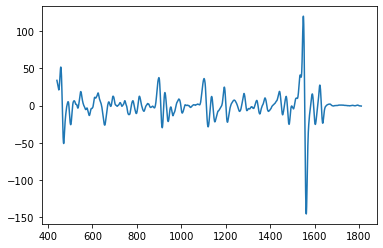

In [92]:
plt.plot(wns, X_sg[0])

In [93]:
X_test = X[0]
X_sg_test = X_sg[0]

In [94]:
sg1_max = argrelmax(X_sg_test)[0]

sg1_max = [i for i in sg1_max if X_sg_test[i] > 5]

peaks = np.where(np.diff(np.sign(X_sg_test)))[0]

In [95]:
peaks_tmp = peaks[np.searchsorted(peaks, sg1_max)]

peaks_tmp



array([  48,  107,  181,  242,  402,  402,  536,  626,  695,  762,  934,
        985, 1115, 1345, 1404, 1521, 1624, 1701, 1810, 1889, 2019, 2073,
       2230, 2230, 2230, 2310, 2380])

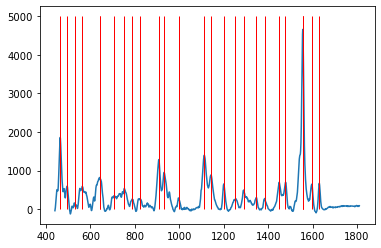

In [96]:
plt.plot(wns, X_test)
plt.vlines(wns[peaks_tmp], ymin=0, ymax=5000, color="red", linewidth=1)